In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [7]:
train_dir='/content/drive/MyDrive/Train_GradProj'
test_dir='/content/drive/MyDrive/Test_GradProj'
trainn='/content/drive/MyDrive/Train_GradProj/N'
trains='/content/drive/MyDrive/Train_GradProj/S'
trainv='/content/drive/MyDrive/Train_GradProj/V'
testn='/content/drive/MyDrive/Test_GradProj/N'
tests='/content/drive/MyDrive/Test_GradProj/S'
testv='/content/drive/MyDrive/Test_GradProj/V'

In [8]:
trainn_names=os.listdir(trainn)
trains_names=os.listdir(trains)
trainv_names=os.listdir(trainv)
testn_names=os.listdir(testn)
tests_names=os.listdir(tests)
testv_names=os.listdir(testv)

['/content/drive/MyDrive/Train_GradProj/N/Rfig_992.png', '/content/drive/MyDrive/Train_GradProj/N/Rfig_993.png', '/content/drive/MyDrive/Train_GradProj/N/Rfig_994.png', '/content/drive/MyDrive/Train_GradProj/N/Rfig_995.png', '/content/drive/MyDrive/Train_GradProj/N/Rfig_996.png', '/content/drive/MyDrive/Train_GradProj/N/Rfig_997.png', '/content/drive/MyDrive/Train_GradProj/N/Rfig_998.png', '/content/drive/MyDrive/Train_GradProj/N/Rfig_999.png']
['/content/drive/MyDrive/Train_GradProj/S/fig_31201707.png', '/content/drive/MyDrive/Train_GradProj/S/fig_31201708.png', '/content/drive/MyDrive/Train_GradProj/S/fig_31201709.png', '/content/drive/MyDrive/Train_GradProj/S/fig_31201713.png', '/content/drive/MyDrive/Train_GradProj/S/fig_31201714.png', '/content/drive/MyDrive/Train_GradProj/S/fig_31201715.png', '/content/drive/MyDrive/Train_GradProj/S/fig_31201716.png', '/content/drive/MyDrive/Train_GradProj/S/fig_31201717.png']
['/content/drive/MyDrive/Train_GradProj/V/Vfig_6724.png', '/content/dr

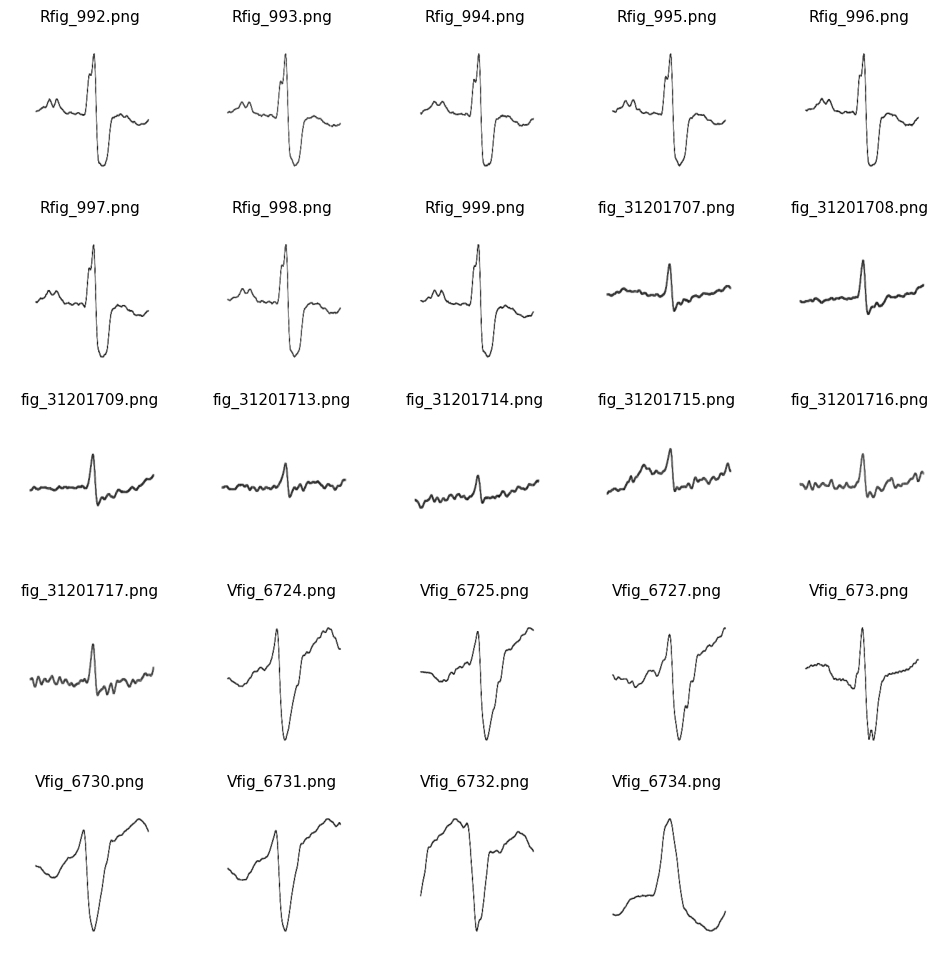

In [9]:
rows= 5
columns= 5
fig = plt.gcf()
fig.set_size_inches(12,12)
n_img= [os.path.join(trainn, filename) for filename in trainn_names[0:8]]
s_img= [os.path.join(trains, filename) for filename in trains_names[0:8]]
v_img= [os.path.join(trainv, filename) for filename in trainv_names[0:8]]
print(n_img)
print(s_img)
print(v_img)
merged_img= n_img + s_img +v_img
for i, img_path in enumerate(merged_img):
  title = img_path.split("/", 6)[6]
  plot = plt.subplot(rows, columns,i+1)
  plot.axis("Off")
  img = mpimg.imread(img_path)
  plot.set_title(title, fontsize = 11)
  plt.imshow(img, cmap= "gray")
plt.show()

In [10]:
import os

file_path = '/content/drive/MyDrive/Train_GradProj'

if os.path.exists(file_path):
    print(f"The file {file_path} exists.")
else:
    print(f"The file {file_path} does not exist.")


The file /content/drive/MyDrive/Train_GradProj exists.


In [11]:
dgen_train= ImageDataGenerator(rescale= 1./255, validation_split= 0.2, zoom_range= 0.2, horizontal_flip= True)
dgen_validation= ImageDataGenerator(rescale= 1./255,)
dgen_test= ImageDataGenerator(rescale= 1./255,)
train_generator= dgen_train.flow_from_directory('/content/drive/MyDrive/Train_GradProj', target_size = (150, 150), subset = 'training', batch_size = 32,classes=['N','S','V'])
validation_generator= dgen_train.flow_from_directory('/content/drive/MyDrive/Train_GradProj', target_size = (150, 150), subset= "validation", batch_size= 32,classes=['N','S','V'])
test_generator= dgen_test.flow_from_directory(test_dir, target_size = (150, 150), batch_size = 32,classes=['N','S','V'])

Found 23969 images belonging to 3 classes.
Found 5991 images belonging to 3 classes.
Found 15546 images belonging to 3 classes.


In [12]:
print("Class labels: ", train_generator.class_indices)
print("Image shape: ", train_generator.image_shape)

Class labels:  {'N': 0, 'S': 1, 'V': 2}
Image shape:  (150, 150, 3)


In [13]:
model = Sequential()
model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [14]:
model.compile(Adam(learning_rate= 0.001), loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
history= model.fit(train_generator, epochs= 1, validation_data= validation_generator)

238/750 [========>.....................] - ETA: 1:10:03 - loss: 0.7845 - accuracy: 0.6603

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

In [ ]:
from google.colab import files
from keras.preprocessing import image
import keras.utils as image

uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/' + filename
  img = image.load_img(img_path, target_size = (150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis = 0)
  prediction = model.predict(images)

  if prediction == 0:
    print("The report is COVID-19 Positive")
  else:
    print("The report is COVID-19 Negative")

In [ ]:
model.save("model.h5")